# Student Online Learning Quiz Attempt Timing Analysis
 + From: Minor 1 – EDA
 + Extension: Analyze attempt timing → early vs late submission patterns.
 + Add-ons: Scatter plots, correlation.
 + Difficulty: Medium"

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("quiz_attempts.csv")

In [11]:
print(data.head())


  student_id quiz_id    scheduled_time      attempt_time  score
0       S001   QZ401  2025-12-10 10:00  2025-12-10 09:15     90
1       S002   QZ401  2025-12-10 10:00  2025-12-10 09:25     88
2       S003   QZ401  2025-12-10 10:00  2025-12-10 09:35     85
3       S004   QZ401  2025-12-10 10:00  2025-12-10 09:45     82
4       S005   QZ401  2025-12-10 10:00  2025-12-10 09:50     80


In [12]:
data["scheduled_time"] = pd.to_datetime(data["scheduled_time"])
data["attempt_time"] = pd.to_datetime(data["attempt_time"])


In [13]:
data["time_difference_minutes"] = (
    (data["attempt_time"] - data["scheduled_time"])
    .dt.total_seconds() / 60
)


In [14]:
def classify_attempt(minutes):
    if minutes < 0:
        return "Early"
    elif minutes == 0:
        return "On Time"
    else:
        return "Late"

data["attempt_category"] = data["time_difference_minutes"].apply(classify_attempt)


In [16]:
print(data["attempt_category"].value_counts())







attempt_category
Late       15
Early      13
On Time     2
Name: count, dtype: int64


In [17]:
print(data["score"].describe())



count    30.000000
mean     70.833333
std      14.493954
min      36.000000
25%      65.250000
50%      73.500000
75%      80.750000
max      90.000000
Name: score, dtype: float64


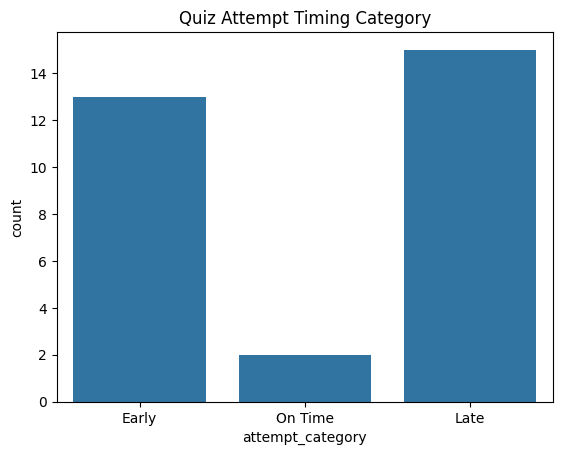

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="attempt_category", data=data)
plt.title("Quiz Attempt Timing Category")
plt.show()




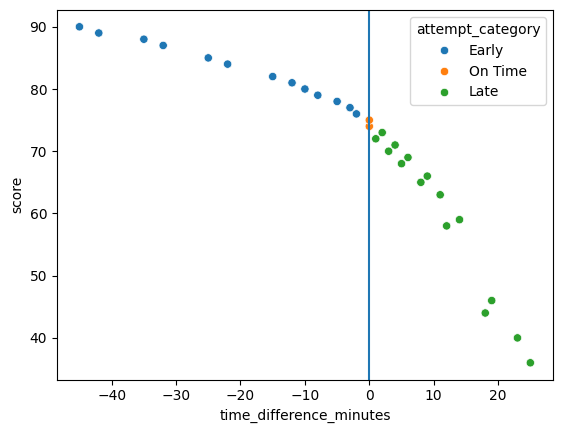

In [22]:
sns.scatterplot(
    x="time_difference_minutes",
    y="score",
    hue="attempt_category",
    data=data
)
plt.axvline(0)
plt.show()


In [23]:
correlation = data["time_difference_minutes"].corr(data["score"])
print(correlation)


-0.8929347152019926


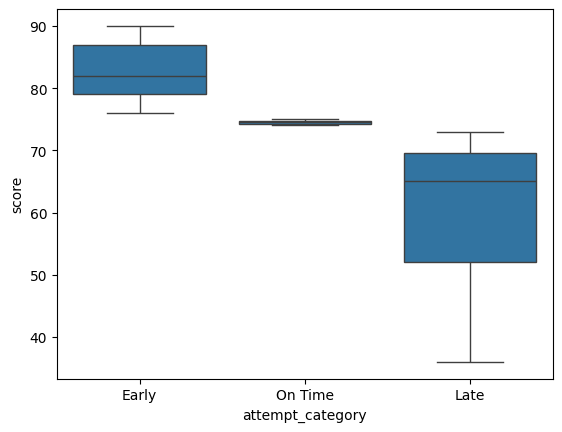

In [24]:
sns.boxplot(
    x="attempt_category",
    y="score",
    data=data
)
plt.show()


In [25]:
print("Conclusion:")
print("Students who attempt quizzes early or near the scheduled time")
print("generally score higher than those who submit late.")
print("Late submissions show lower average scores, highlighting")
print("the importance of time management in online learning.")


Conclusion:
Students who attempt quizzes early or near the scheduled time
generally score higher than those who submit late.
Late submissions show lower average scores, highlighting
the importance of time management in online learning.
